# **TTI109 - Estat√≠stica**
# **Laborat√≥rio 08 - Distribui√ß√£o Normal de Probabilidade**

Nessa aula vamos aprender a construir:

* Identificar distribui√ß√µes normais de probabilidade;
* Estimar m√©dia e desvio padr√£o de uma distribui√ß√£o normal;
* Padronizar uma distribui√ß√£o normal usando escores-z;
* Empregar tabelas de distribui√ß√£o normal padr√£o para determinar probabilidades;
* Empregar a ferramenta Python como alternativa ao uso das tabelas de distribui√ß√£o normal padr√£o.

## **A curva normal**
Uma distribui√ß√£o normal de probabilidade √© completamente definida pelos dois par√¢metros de sua fun√ß√£o densidade de probabilidade: a m√©dia $\mu$ e o desvio padr√£o $\sigma$:

\begin{align}
        \text{pdf}(x)=\mathscr{N}(x)=\frac{1}{\sigma\sqrt{2\pi}}\text{exp}\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)
\end{align}

No Python, usaremos o m√©todo `pdf` *(probability density function)* da classe `stats.norm` (biblioteca `scipy`).

### **Exemplo:**

In [24]:
# Bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats

In [25]:
# Cria√ß√£o de uma distribui√ß√£o normal com m√©dia 1.5 e desvio padr√£o 2.0
media, desvpad = 1.5, 2.0
distnorm = stats.norm(media, desvpad)

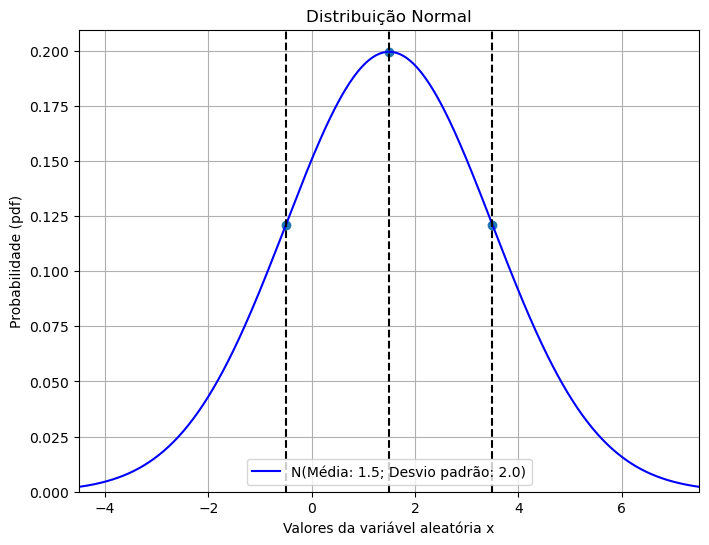

In [30]:
## Representa√ß√£o gr√°fica

# Gera√ß√£o de QUANT pontos no intervalo entre INICIO e FIM
QUANT, INICIO, FIM = 500, media-3*desvpad, media+3*desvpad
x = np.linspace(INICIO, FIM, QUANT)

# C√°lculo da fdp normal para os valores do vetor x
y = distnorm.pdf(x)

# print('Valores de x')
# print(x)
# print('\nValores de y')
# print(y)

## Gr√°fico
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'b')
plt.xlim(INICIO, FIM)
plt.ylim(0, distnorm.pdf(media)+0.01)
plt.title('Distribui√ß√£o Normal')
plt.xlabel('Valores da vari√°vel aleat√≥ria x')
plt.ylabel('Probabilidade (pdf)')
plt.scatter([media - desvpad, media, media + desvpad], [distnorm.pdf(media-desvpad), distnorm.pdf(media), distnorm.pdf(media+desvpad)])
plt.vlines([media-desvpad, media, media+desvpad], 0, distnorm.pdf(media)+0.01, colors='k', linestyles='dashed')
plt.grid()
plt.legend(['N(M√©dia: ' + str(media) + '; Desvio padr√£o: ' + str(desvpad) + ')'])
plt.show()

## **Plotando v√°rias distribui√ß√µes normais**

In [4]:
# M√©dias e desvios padr√£o
medias = [-2, 0, 3, 6]
desvios = [0.75, 1, 3, 1.5]

# Cores das curvas: preto, verde, azul e vermelho
cores = ['k', 'g', 'b', 'r']

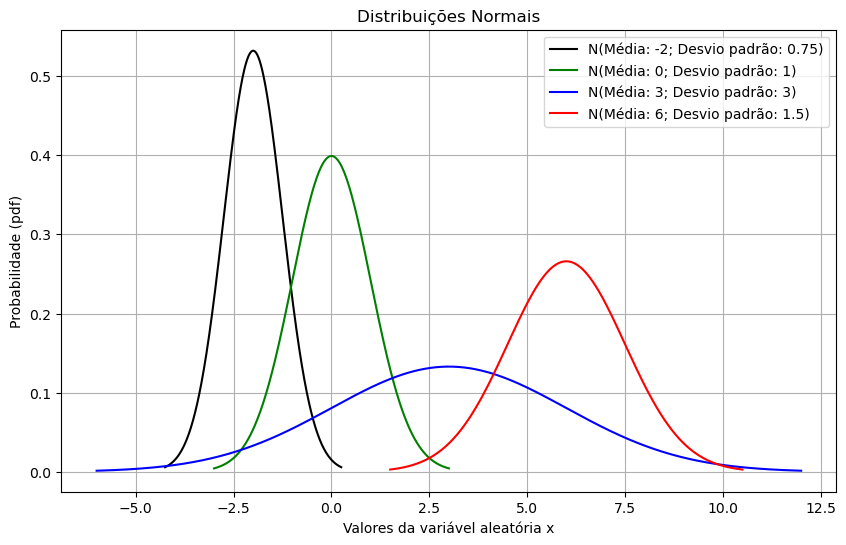

In [5]:
# Tamanho da figura
plt.figure(figsize=(10, 6))

# Cria a lista para as legendas
legenda = []

# Plotagem dos gr√°ficos
for mu, std, cor in zip(medias, desvios, cores):
  normal = stats.norm(mu, std)
  QUANT, INICIO, FIM = 500, mu-3*std, mu+3*std
  x = np.linspace(INICIO, FIM, QUANT)
  y = normal.pdf(x)
  legenda.append('N(M√©dia: ' + str(mu) + '; Desvio padr√£o: ' + str(std) + ')')
  plt.plot(x, y, cor)

# Atributos do gr√°fico
plt.title('Distribui√ß√µes Normais')
plt.xlabel('Valores da vari√°vel aleat√≥ria x')
plt.ylabel('Probabilidade (pdf)')
plt.legend(legenda)
plt.grid(True)
plt.show()

## **Probabilidades na curva normal padr√£o**

*   Encontre a √°rea acumulada que corresponde a um escore-z de ‚Äì2,19.
*   Encontre a √°rea acumulada que corresponde a um escore-z de 2,17.
*   Encontre a √°rea sob a curva normal padr√£o √† direita de z = 1,06.
*   Encontre a √°rea sob a curva normal padr√£o entre z = ‚Äì1,5 e z = 1,25.




Usaremos os m√©todos `cdf` *(Cumulative distribution function)* para √°reas √† esquerda de um escore-z e `sf` *(Survival function, definida como sf = 1 - cdf)* para √°reas √† direita.

In [6]:
# Defini√ß√£o da distribui√ß√£o normal padr√£o
media, std = 0, 1
normpad = stats.norm(media, std)

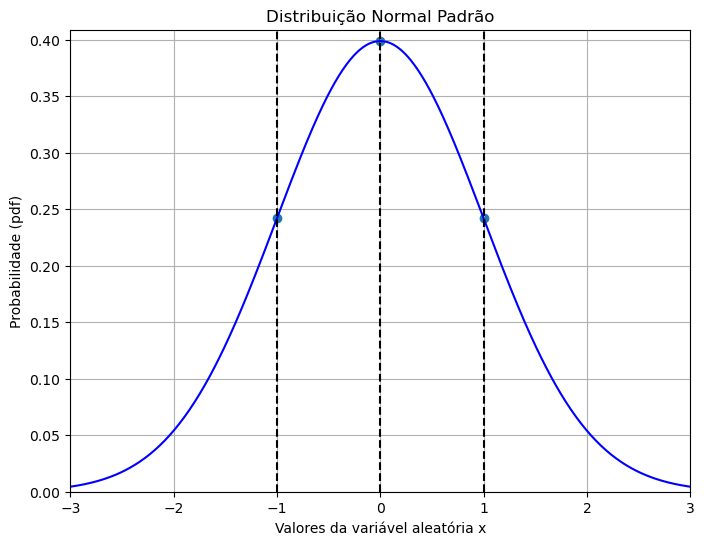

In [7]:
## Representa√ß√£o gr√°fica


# Gera√ß√£o de QUANT pontos no intervalo entre INICIO e FIM
QUANT, INICIO, FIM = 500, media-3*std, media+3*std
x = np.linspace(INICIO, FIM, QUANT)

# C√°lculo da fdp normal para os valores do vetor x
y = normpad.pdf(x)


# # Gr√°fico
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'b')
plt.xlim(INICIO, FIM)
plt.ylim(0, normpad.pdf(media)+0.01)
plt.title('Distribui√ß√£o Normal Padr√£o')
plt.xlabel('Valores da vari√°vel aleat√≥ria x')
plt.ylabel('Probabilidade (pdf)')
plt.scatter([media - std, media, media + std], [normpad.pdf(media-std), normpad.pdf(media), normpad.pdf(media+std)])
plt.vlines([media-std, media, media+std], 0, normpad.pdf(media)+0.01, colors='k', linestyles='dashed')
plt.grid()
plt.show()

In [8]:
# √Årea acumulada que corresponde a um escore-z de ‚Äì2,19
area1 = normpad.cdf(-2.19)
print(f'√Årea acumulada que corresponde a um escore-z de ‚Äì2,19: {area1:.4f}')


√Årea acumulada que corresponde a um escore-z de ‚Äì2,19: 0.0143


In [9]:
# √Årea acumulada que corresponde a um escore-z de 2,17
area2 = normpad.cdf(2.17)
print(f'√Årea acumulada que corresponde a um escore-z de 2,17: {area2:.4f}')


√Årea acumulada que corresponde a um escore-z de 2,17: 0.9850


In [10]:
# √Årea sob a curva normal padr√£o √† direita de z = 1,06
area3 = 1 - normpad.cdf(1.06)
print(f'√Årea sob a curva normal padr√£o √† direita de z = 1,06: {area3:.4f}')

√Årea sob a curva normal padr√£o √† direita de z = 1,06: 0.1446


In [11]:
# √Årea sob a curva normal padr√£o entre z = ‚Äì1,5 e z = 1,25
area4 = normpad.cdf(1.25) - normpad.cdf(-1.5)
print(f'√Årea sob a curva normal padr√£o entre z = ‚Äì1,5 e z = 1,25: {area4:.4f}')

√Årea sob a curva normal padr√£o entre z = ‚Äì1,5 e z = 1,25: 0.8275


# Encontrando escores-z

#### **Exemplo:**

Dada uma √°rea (uma probabilidade), qual o correspondente escore-z relativo √† uma distribui√ß√£o normal padr√£o? 

O m√©todo *ppf (Percent Point Function)* da classe *stats.norm* resolve esse problema.

*   Determine o escore-*z* que tenha 96,16% da √°rea de distribui√ß√£o √† sua direita.
*   Determine o escore-*z* para o qual 95% da √°rea de distribui√ß√£o esteja entre *‚Äìz* e *z*.


In [12]:
# Bibliotecas
from scipy import stats

# Construindo a distribui√ß√£o normal padr√£o
mu, std = 0, 1
normpad = stats.norm(mu, std)

# Escore-z que tenha 96,16% da √°rea de distribui√ß√£o √† sua direita
z1 = normpad.ppf(1-0.9616)
print(f'z1 = {z1:.3f}')
print(f'√Årea √† direita = {normpad.sf(z1)*100:.2f}%\n')

# Escore-z para o qual 95% da √°rea de distribui√ß√£o esteja entre ‚Äìz e z
z2 = normpad.ppf(0.05)
print(f'z2 = {z2:.3f}')
print(f'√Årea √† esquerda de z = {z2:.3f} √© {normpad.cdf(z2)*100:.2f}%')
print(f'√Årea √† direita de z = {-z2:.3f} √© {normpad.sf(-z2)*100:.2f}%')

z1 = -1.770
√Årea √† direita = 96.16%

z2 = -1.645
√Årea √† esquerda de z = -1.645 √© 5.00%
√Årea √† direita de z = 1.645 √© 5.00%


#### **Exerc√≠cio:** 

Um pesquisador testa as dist√¢ncias de frenagem de diversos carros. A dist√¢ncia de frenagem de 60 milhas por hora at√© uma parada completa em pista seca √© medida em p√©s. As dist√¢ncias de frenagem de uma
amostra de carros s√£o normalmente distribu√≠das, com m√©dia de 129 p√©s e desvio padr√£o de 5,18 p√©s.

Qual √© a maior dist√¢ncia de frenagem que um desses carros poderia ter e ainda estar no grupo do 1% mais baixo? (*Adaptado de: Consumer Reports*)

In [13]:
# Construindo a distribui√ß√£o normal das dist√¢ncias de frenagem
m, std = 129, 5.18
normpad = stats.norm(m, std)

# Dist√¢ncia m√°xima com 1% da √°rea de distribui√ß√£o √† sua esquerda
dist1 = normpad.ppf(0.01)
print(f'Dist√¢ncia m√°xima com 1% da √°rea de distribui√ß√£o √† sua esquerda: {dist1:.2f} p√©s')
print(f'Area √† esquerda de {dist1:.2f} p√©s: {normpad.cdf(dist1)*100:.2f}%')




Dist√¢ncia m√°xima com 1% da √°rea de distribui√ß√£o √† sua esquerda: 116.95 p√©s
Area √† esquerda de 116.95 p√©s: 1.00%


### **Exerc√≠cio:**

O tempo de trabalho dos funcion√°rios em uma empresa √© normalmente distribu√≠do, com m√©dia de 11,2 anos e desvio padr√£o de 2,1 anos.

Em uma redu√ß√£o de quadro, os 10% com menos tempo na empresa s√£o demitidos. Qual √© o tempo m√°ximo que um funcion√°rio pode ter trabalhado na empresa e ainda assim ser cortado?

In [14]:
# Construindo a distribui√ß√£o normal dos tempos de empresa
m, std = 11.2, 2.1
normpad = stats.norm(m, std)


# Tempo de empresa m√°ximo com 10% da √°rea de distribui√ß√£o √† sua esquerda
tempo1 = normpad.ppf(0.10)
print(f'Tempo de empresa m√°ximo com 10% da √°rea de distribui√ß√£o √† sua esquerda: {tempo1:.2f} anos')
print(f'√Årea √† esquerda de {tempo1:.2f} anos: {normpad.cdf(tempo1)*100:.2f}%')




Tempo de empresa m√°ximo com 10% da √°rea de distribui√ß√£o √† sua esquerda: 8.51 anos
√Årea √† esquerda de 8.51 anos: 10.00%


# Distribui√ß√µes amostrais

### **Exemplo:**

Os valores populacionais $\{1, 3, 5, 7\}$ s√£o equiprov√°veis. Esses valores s√£o escritos em peda√ßos de papel e colocados em uma caixa. Ent√£o, selecionam-se dois peda√ßos de papel aleatoriamente, com reposi√ß√£o.

*   **(a)** Liste todas as amostras poss√≠veis de tamanho $ùëõ = 2$ e calcule suas respectivas m√©dias.
*   **(b)** Encontre a m√©dia, a vari√¢ncia e o desvio
padr√£o das m√©dias amostrais.
*   **(c)** Compare seus resultados com a m√©dia $\mu = 4$,
vari√¢ncia $\sigma^2 = 5$, e desvio padr√£o $\sigma \approx 2,236$ da popula√ß√£o.




In [15]:
## Item (a)

# Bibliotecas
import itertools as it
import pandas as pd

# Chave para permuta√ß√£o
chave = [1, 3, 5, 7]
# Gera√ß√£o de todas as amostras poss√≠veis de tamanho 2
am2a2 = list(it.product(chave, repeat=2))
# Cria√ß√£o de tabela com poss√≠veis amostras, acompanhadas de suas m√©dias
amostras = pd.DataFrame({'Amostras': am2a2,
                        'M√©dia': [(x1+x2)/2 for (x1, x2) in am2a2]})
display(amostras)

Amostras  M√©dia
0    (1, 1)    1.0
1    (1, 3)    2.0
2    (1, 5)    3.0
3    (1, 7)    4.0
4    (3, 1)    2.0
5    (3, 3)    3.0
6    (3, 5)    4.0
7    (3, 7)    5.0
8    (5, 1)    3.0
9    (5, 3)    4.0
10   (5, 5)    5.0
11   (5, 7)    6.0
12   (7, 1)    4.0
13   (7, 3)    5.0
14   (7, 5)    6.0
15   (7, 7)    7.0

In [16]:
## Item (b)

# Determina√ß√£o da frequ√™ncia de cada m√©dia
contagem = amostras['M√©dia'].value_counts().sort_index()
# Cria√ß√£o de tabela com as poss√≠veis m√©dias e suas respectivas probabilidades
dist_prob = pd.DataFrame({'M√©dias': contagem.index,
                         'Frequ√™ncia': contagem})
dist_prob['Probabilidade'] = dist_prob['Frequ√™ncia'] / dist_prob['Frequ√™ncia'].sum()
display(dist_prob)
# C√°lculo da m√©dia das m√©dias amostrais
media_amostras = (dist_prob['M√©dias']*dist_prob['Probabilidade']).sum()
print(f'M√©dia das m√©dias amostrais = {media_amostras:.2f}')
# C√°lculo da vari√¢ncia das m√©dias amostrais
var_amostras = (dist_prob['M√©dias']**2*dist_prob['Probabilidade']).sum() - media_amostras**2
print(f'Vari√¢ncia das m√©dias amostrais = {var_amostras:.2f}')
# C√°lculo do desvio padr√£o das m√©dias amostrais
std_amostras = var_amostras**(1/2)
print(f'Desvio padr√£o das m√©dias amostrais = {std_amostras:.2f}')

M√©dias  Frequ√™ncia  Probabilidade
M√©dia                                   
1.0       1.0           1         0.0625
2.0       2.0           2         0.1250
3.0       3.0           3         0.1875
4.0       4.0           4         0.2500
5.0       5.0           3         0.1875
6.0       6.0           2         0.1250
7.0       7.0           1         0.0625

M√©dia das m√©dias amostrais = 4.00
Vari√¢ncia das m√©dias amostrais = 2.50
Desvio padr√£o das m√©dias amostrais = 1.58


In [17]:
## Item (c)

mu, std = 4, 5**(1/2)
print('De acordo com a teoria das distribui√ß√µes amostrais:')
print(f'A m√©dia mu_x = {media_amostras:.2f} deve ser igual a m√©dia populacional mu = {mu}.')
print(f'O desvio padr√£o sigma_x = {std_amostras:.2f} deve ser igual a sigma/raiz(n) = {std/(2**(1/2)):.2f}')

De acordo com a teoria das distribui√ß√µes amostrais:
A m√©dia mu_x = 4.00 deve ser igual a m√©dia populacional mu = 4.
O desvio padr√£o sigma_x = 1.58 deve ser igual a sigma/raiz(n) = 1.58


# Probabilidades e o TLC

### **Exerc√≠cio:**

O gasto m√©dio com alojamento e refei√ß√£o, por ano, em faculdades de quatro anos √© de US\$ 9.126,00. Voc√™ seleciona aleatoriamente 9 dessas faculdades. Qual √© a probabilidade de que a m√©dia de gastos com alojamento e refei√ß√£o seja menor que US\$ 9.400,00?

Suponha que os gastos com alojamento e refei√ß√£o sejam normalmente distribu√≠dos, com desvio padr√£o de US$ 1.500,00 (*Adaptado de: National Center for
Education Statistics*).

In [18]:
# Determina√ß√£o da m√©dia e desvio padr√£o amostrais
mu,std, n = 9126, 1500, 9
mu_x , std_x = m, std/(n**(1/2))


# Gera√ß√£o da distribui√ß√£o normal amostral (TLC)
normpad = stats.norm(mu_x, std_x)


# C√°lculo da probabilidade
prob = normpad.cdf(9400)
print(f'Probabilidade de que a m√©dia amostral seja menor que 9400: {prob:.4f}')



Probabilidade de que a m√©dia amostral seja menor que 9400: 1.0000


### **Exerc√≠cio:**

A d√≠vida m√©dia no cart√£o de cr√©dito mantida por universit√°rios √© normalmente distribu√≠da, com m√©dia de US\$ 3.173,00 e desvio padr√£o de
US\$ 1.120,00 (*Adaptado de: Sallie Mae*).

*   Qual √© a probabilidade de que um universit√°rio selecionado aleatoriamente,
que possui um cart√£o de cr√©dito, tenha uma divida menor
que US\$ 2.700?
*   Voc√™ seleciona aleatoriamente 25 universit√°rios que possuem cart√£o
de cr√©dito. Qual √© a probabilidade de que a m√©dia dessas d√≠vidas
m√©dias seja menor que US\$ 2.700?

In [19]:
# No primeiro item, devemos calcular a probabilidade associada a um determinado
# valor da vari√°vel aleat√≥ria d√≠vida no cart√£o de cr√©dito.
mu, std = 3173, 1120

# Gera√ß√£o da distribui√ß√£o normal da popula√ß√£o
normpad = stats.norm(mu, std)

# C√°lculo da probabilidade
gastos = normpad.cdf(2700)
gastos = gastos*100
print(f'Probabilidade de que um cliente tenha d√≠vida inferior a $2700: {gastos:.2f}%')

# No segundo item, devemos calcular uma probabilidade associada a uma
# m√©dia amostral.
mu, std, n = 3173, 1120, 25
mu_x, std_x = mu, std/(n**(1/2))

# Gera√ß√£o da distribui√ß√£o das m√©dias amostrais
normpad = stats.norm(mu_x, std_x)

# C√°lculo da probabilidade
gastos = normpad.cdf(2700)
gastos = gastos*100
print(f'Probabilidade de que a m√©dia de 25 clientes tenha d√≠vida inferior a $2700: {gastos:.2f}%')


Probabilidade de que um cliente tenha d√≠vida inferior a $2700: 33.64%
Probabilidade de que a m√©dia de 25 clientes tenha d√≠vida inferior a $2700: 1.74%
